In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Blodgett_out.csv')

In [3]:
df

,Reach,DateTime,elev,width,D50,slope,yield
0,upstream,2010-04-01 00:00,1500.465,0.0,88.810727,-0.008333,0.0
1,upstream,2010-04-01 01:00,1500.465,0.0,88.810727,-0.008333,0.0
2,upstream,2010-04-01 02:00,1500.465,0.0,88.810727,-0.008333,0.0
3,upstream,2010-04-01 03:00,1500.465,0.0,88.810727,-0.008333,0.0
4,upstream,2010-04-01 04:00,1500.465,0.0,88.810727,-0.008333,0.0
...,...,...,...,...,...,...,...
160825,feeder,2020-07-31 18:00,0.000,0.0,0.000000,0.000000,0.0
160826,feeder,2020-07-31 19:00,0.000,0.0,0.000000,0.000000,0.0
160827,feeder,2020-07-31 20:00,0.000,0.0,0.000000,0.000000,0.0
160828,feeder,2020-07-31 21:00,0.000,0.0,0.000000,0.000000,0.0


In [4]:
upstream = df[df['Reach']=='upstream']
df_us = df[df['Reach']=='deposit_upstream']
df_ds = df[df['Reach']=='deposit_downstream']
downstream = df[df['Reach']=='downstream']

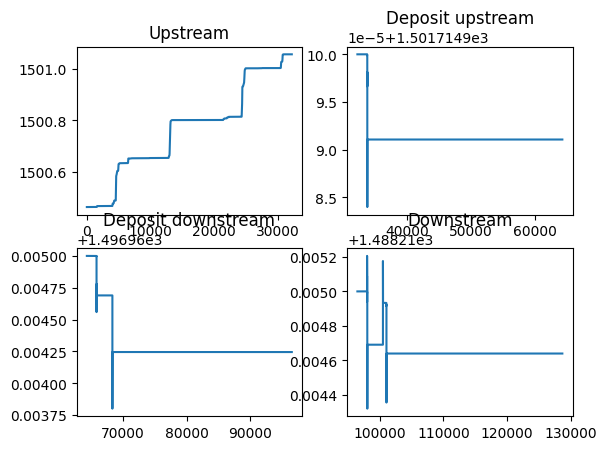

In [5]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(upstream['elev'])
ax[0,0].set_title('Upstream')
ax[0,1].plot(df_us['elev'])
ax[0,1].set_title('Deposit upstream')
ax[1,0].plot(df_ds['elev'])
ax[1,0].set_title('Deposit downstream')
ax[1,1].plot(downstream['elev'])
ax[1,1].set_title('Downstream')
plt.show()

Text(0.5, 1.0, 'Downstream')

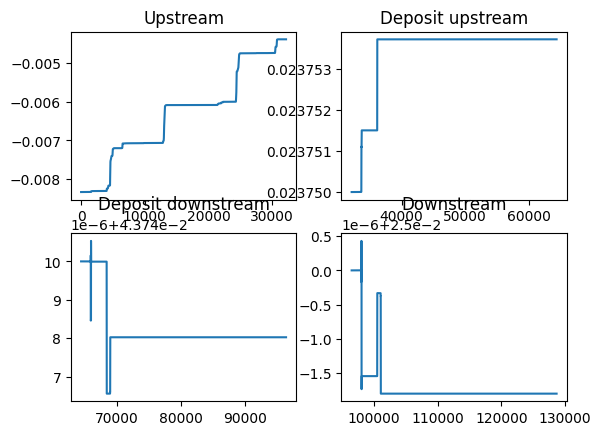

In [6]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(upstream['slope'])
ax[0,0].set_title('Upstream')
ax[0,1].plot(df_us['slope'])
ax[0,1].set_title('Deposit upstream')
ax[1,0].plot(df_ds['slope'])
ax[1,0].set_title('Deposit downstream')
ax[1,1].plot(downstream['slope'])
ax[1,1].set_title('Downstream')

Text(0.5, 1.0, 'Downstream')

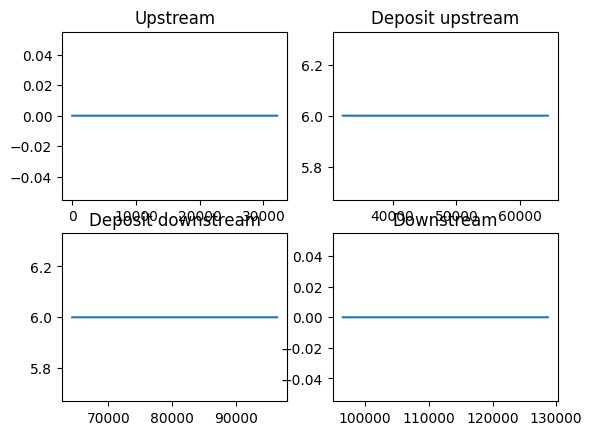

In [7]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(upstream['width'])
ax[0,0].set_title('Upstream')
ax[0,1].plot(df_us['width'])
ax[0,1].set_title('Deposit upstream')
ax[1,0].plot(df_ds['width'])
ax[1,0].set_title('Deposit downstream')
ax[1,1].plot(downstream['width'])
ax[1,1].set_title('Downstream')

Text(0.5, 1.0, 'Downstream')

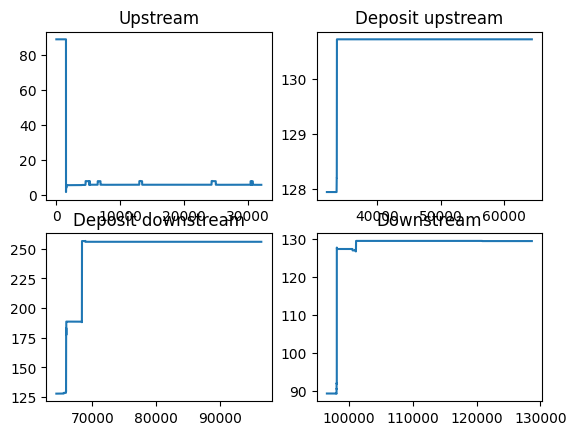

In [8]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(upstream['D50'])
ax[0,0].set_title('Upstream')
ax[0,1].plot(df_us['D50'])
ax[0,1].set_title('Deposit upstream')
ax[1,0].plot(df_ds['D50'])

ax[1,0].set_title('Deposit downstream')
ax[1,1].plot(downstream['D50'])
ax[1,1].set_title('Downstream')

In [9]:
print(downstream['yield'].sum())

3577.733873331693


<Axes: >

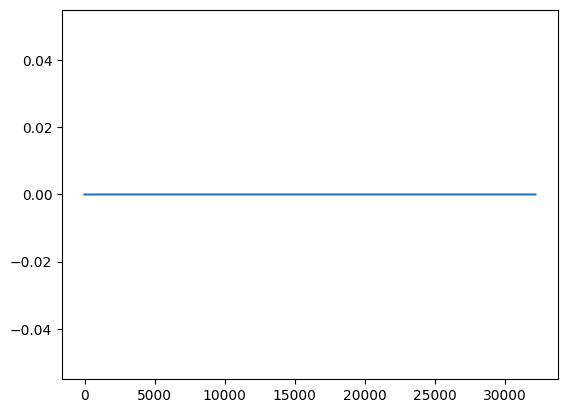

In [10]:
upstream['yield'].plot()

<Axes: >

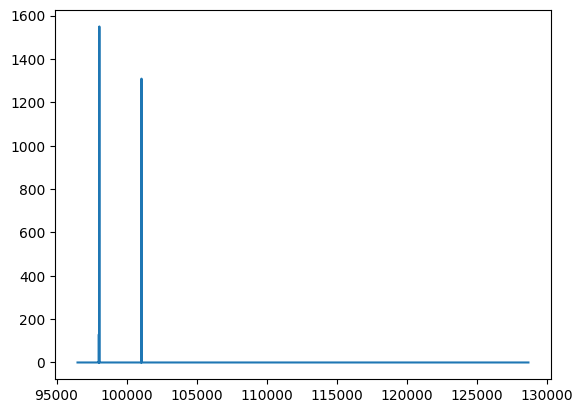

In [11]:
downstream['yield'].plot()

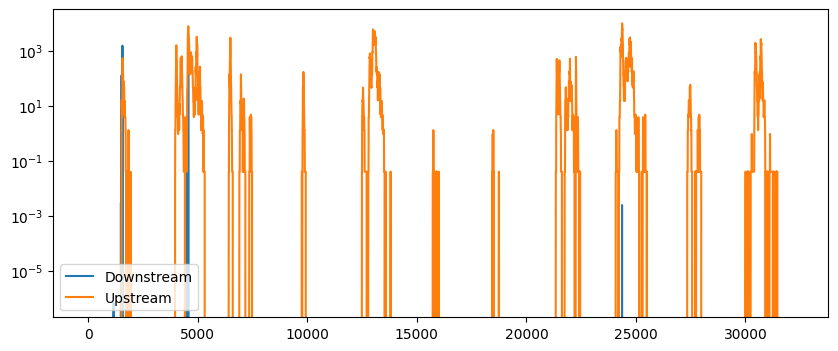

In [12]:
df_f = df[df['Reach'] == 'feeder']
df_f.reset_index(inplace=True)
downstream_r = downstream.reset_index()
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(downstream_r['yield'], label='Downstream')
ax.plot(df_f['yield'], label='Upstream')
ax.set_yscale('log')

#ax.set_ylim((1e-5, 4e4))
plt.legend(loc='lower left')
plt.show()

In [15]:
start = None
end = None
for i in downstream.index:
    if downstream.loc[i, 'DateTime'] == '2002-04-01 00:00':
        start = i
    if downstream.loc[i, 'DateTime'] == '2002-07-31 22:00':
        end = i
        
print(start, end)

165321 168246


In [16]:
totyield = 0
for i in range(165321, 168247):
    totyield += downstream.loc[i, 'yield']
print(totyield)

921919.1083266385


downstream yield
2012: 914679 kg
2015: 193617
2018: 2195623 
2019: 435761
2020: 1319620 

In [37]:
qs_in = 0
for i in df_f.index:
    if '2020' in str(df_f.loc[i, 'DateTime']):
        qs_in += df_f.loc[i, 'yield']
print(qs_in)

175524.42705751382


In [38]:
qs_out = 0
for i in downstream_r.index:
    if '2020' in str(downstream_r.loc[i, 'DateTime']):
        qs_out += downstream_r.loc[i, 'yield']
print(qs_out)

0.0
